In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Forward propagation code

## Bank transactions example
* Make predictions based on:
* Number of children = 2
* Number of existing accounts = 3

![Image](forward-propagation.png)

## Input

In [2]:
import numpy as np
input_data = np.array([2, 3])
input_data

array([2, 3])

## Weights

In [3]:
weights = {
    "node_0": np.array([1, 1]),
    "node_1": np.array([-1, 1]),
    "output": np.array([2, -1]),
}
weights

{'node_0': array([1, 1]), 'node_1': array([-1,  1]), 'output': array([ 2, -1])}

## Hidden layers

In [4]:
node_0_value = (input_data * weights["node_0"]).sum()
node_1_value = (input_data * weights["node_1"]).sum()
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_values

array([5, 1])

## Outputs

In [5]:
output = (hidden_layer_values * weights['output']).sum()
output

9

# Activation functions

## Hyperbolic Tangent

For a long time, an s-shaped function called tanh was a popular activation function. 

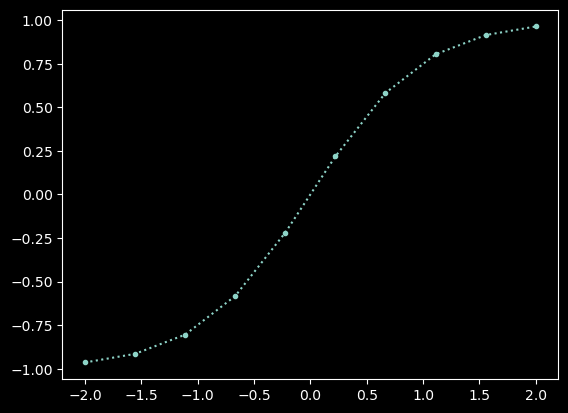

In [6]:
ls = np.linspace(-2, 2, 10)
plt.plot(ls, np.tanh(ls), '.:'); plt.show()

In [7]:
import numpy as np
# input_data = np.array([-1, 2])
# weights = {'node_0': np.array([3, 3]),
#            'node_1': np.array([1, 5]),
#            'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_0_output

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
node_1_output

hidden_layer_outputs = np.array([node_0_output, node_1_output])
hidden_layer_outputs

output = (hidden_layer_outputs * weights['output']).sum()
print(output)

1.2382242525694254


* Today, the standard in both industry and research applications is something called ReLU (Rectified Linear Activation)

## ReLU (Rectified Linear Activation)

$$RELU(x) = 
\begin{cases}
0\ \ if \ x \ \lt 0\\
x\ \ if \ x \ \ge 0
\end{cases}$$

In [8]:
def relu(input):
    return max(0, input)

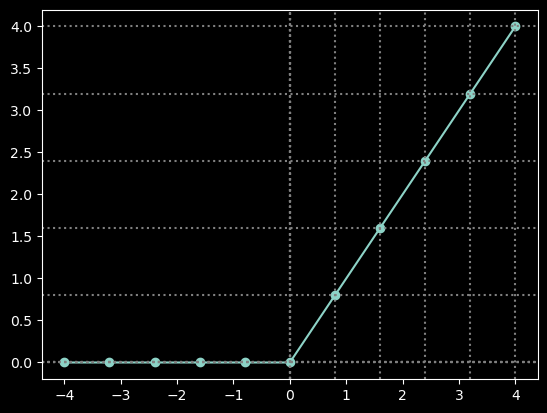

In [9]:
ls = np.linspace(-4, 4, 11)
# plt.figure(figsize=(10,5)); 
relus = [relu(i) for i in ls]
plt.plot(ls, relus, 'o-')
for r in relus:
    plt.axhline(r, linestyle=':', color='gray')
    plt.axvline(r, linestyle=':', color='gray')
plt.show()

In [10]:
input_data = np.array([3, 5])

In [11]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [12]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = (node_0_input)
# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)
# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])
# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()
# Print model output
print(model_output)

52


> You predicted 52 transactions. Without this activation function, you would have predicted a negative number!

## Applying the network to many observations/rows of data

In [13]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
input_data

[array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4])]

In [14]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
weights

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

In [15]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = input_data_row @ weights['node_0']
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = input_data_row @ weights['node_1']
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = hidden_layer_outputs @ weights['output']
    model_output = relu(input_to_final_layer )

    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)   

[52, 63, 0, 148]


# Deeper networks

![Image](multiple-hidden-layers.png)

## Representation learning
* Deep networks internally build representations of patterns in the data
* Partially replace the need for feature engineering
* Subsequent layers build increasingly sophisticated representations of raw data

## Forward propagation in a deeper network

![Image](ch1ex9.png)

In [16]:
hl1 = np.array([np.array([1,1]) @ np.array([2,4]),
                np.array([1,1]) @ np.array([4,-5])])
hl2 = np.array([hl1 @ np.array([0,1]),
                hl1 @ np.array([1,1])])
hl2 @ np.array([5,1])

0

## Multi-layer neural networks

![Image](ch1ex10.png)

In [17]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights["node_0_0"]).sum()
    node_0_0_output = relu(node_0_0_input)
    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights["node_0_1"]).sum()
    node_0_1_output = relu(node_0_1_input)
    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights["node_1_0"]).sum()
    node_1_0_output = relu(node_1_0_input)
    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights["node_1_1"]).sum()
    node_1_1_output = relu(node_1_1_input)
    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights["output"]).sum()
    # Return model_output
    return model_output

input_data = np.array([3, 5])
weights = {
    "node_0_0": np.array([2, 4]),
    "node_0_1": np.array([4, -5]),
    "node_1_0": np.array([-1, 2]),
    "node_1_1": np.array([1, 2]),
    "output": np.array([2, 7]),
}
output = predict_with_network(input_data)
print(output)

182


## Deep learning
* Modeler doesn´t need to specify the interactions
* When you train the model, the neural network gets weights that find the relevant patterns to make better predictions